# Frequency Comparison of Various Bar Types

This study aims to replicate and analyze the daily frequency of different types of bars as described in Chapter 2 of "Advances in Financial Machine Learning." Specifically, we examine the S&P 500 E-Mini futures contract "ESH4" for February 2024, comparing the daily count of bars constructed using tick, volume, and dollar methods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from onetrading.data.bar import TickBar, VolumeBar, DollarBar

In [2]:
symbol = "ESH4"
start_date = "2024-02-01"
end_date = "2024-02-29"
tz = "US/Eastern"

In [3]:
tick = TickBar(symbol, tz)
volume = VolumeBar(symbol, tz)
dollar = DollarBar(symbol, tz)

tick_bar = tick.get_bar(start_date, end_date, bar_size=5000)
volume_bar = volume.get_bar(start_date, end_date, bar_size=20000)
dollar_bar = dollar.get_bar(start_date, end_date, bar_size=100000000)

In [4]:
freq_tick_bar = (
    tick_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_volume_bar = (
    volume_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_dollar_bar = (
    dollar_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

In [5]:
freq_tick_bar = freq_tick_bar.rename(columns={"symbol": "tick"})
freq_volume_bar = freq_volume_bar.rename(columns={"symbol": "volume"})
freq_dollar_bar = freq_dollar_bar.rename(columns={"symbol": "dollar"})

freq = pd.merge(freq_tick_bar, freq_volume_bar, on="ts_event", how="outer")
freq = pd.merge(freq, freq_dollar_bar, on="ts_event", how="outer")
freq = freq.dropna()

<Axes: title={'center': 'Frequency Comparison of Various Bar Types'}, xlabel='ts_event'>

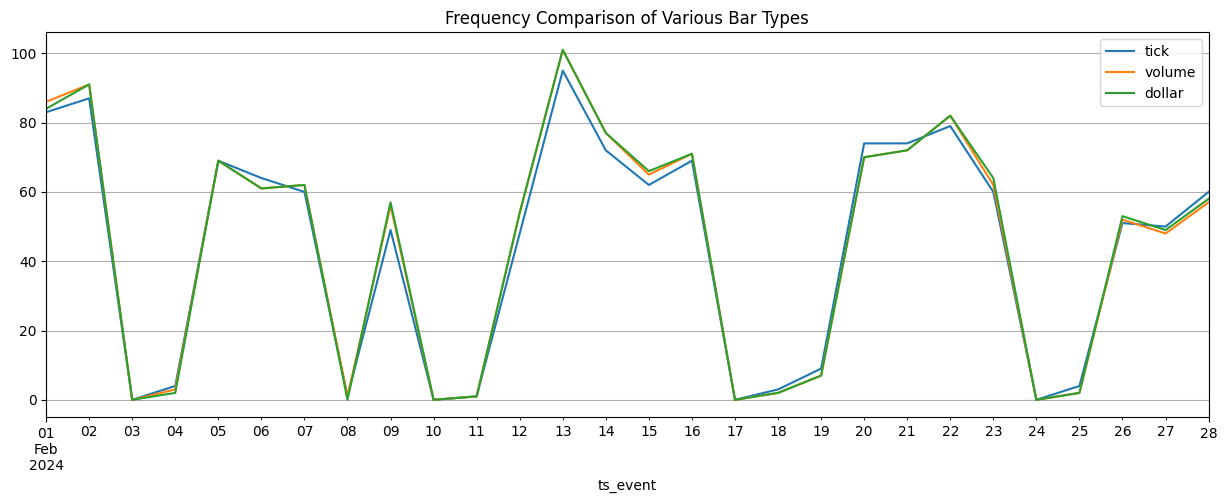

In [6]:
freq.plot(x="ts_event", y=["tick", "volume", "dollar"], figsize=(15, 5), title="Frequency Comparison of Various Bar Types", grid=True)

In [7]:
freq

,ts_event,tick,volume,dollar
0,2024-02-01 00:00:00-05:00,83,86,84
1,2024-02-02 00:00:00-05:00,87,91,91
2,2024-02-03 00:00:00-05:00,0,0,0
3,2024-02-04 00:00:00-05:00,4,3,2
4,2024-02-05 00:00:00-05:00,69,69,69
5,2024-02-06 00:00:00-05:00,64,61,61
6,2024-02-07 00:00:00-05:00,60,62,62
7,2024-02-08 00:00:00-05:00,1,1,0
8,2024-02-09 00:00:00-05:00,49,56,57
9,2024-02-10 00:00:00-05:00,0,0,0
